<a href="https://colab.research.google.com/github/MuhammadNaufalAdiapasa/Pemograman_Python/blob/main/MuhammadNaufalAdiapasaTugas11Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [62]:
ls

3scene@                         datadaun/  Daun.jpg   model_projek/
best_weight_scene_mobileNet.h5  dataset@   hutan.jpg  nnmodel_scene/


In [63]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [64]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("datadaun")
data = []
labels = []

[INFO] loading images...


In [65]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [66]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [67]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [68]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [69]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(147, 64, 64, 3)


In [70]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               313700    
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [71]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [72]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               313700    
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [85]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
14/14 [==============================] - 1s 76ms/step - loss: 0.2713 - accuracy: 0.9110 - val_loss: 0.6867 - val_accuracy: 0.7619
Epoch 2/25
14/14 [==============================] - 1s 65ms/step - loss: 0.2597 - accuracy: 0.9201 - val_loss: 0.7275 - val_accuracy: 0.7551
Epoch 3/25
14/14 [==============================] - 1s 66ms/step - loss: 0.2459 - accuracy: 0.9178 - val_loss: 0.7004 - val_accuracy: 0.7687
Epoch 4/25
14/14 [==============================] - 1s 66ms/step - loss: 0.2029 - accuracy: 0.9429 - val_loss: 0.7045 - val_accuracy: 0.7823
Epoch 5/25
14/14 [==============================] - 1s 67ms/step - loss: 0.1759 - accuracy: 0.9566 - val_loss: 0.6866 - val_accuracy: 0.7891
Epoch 6/25
14/14 [==============================] - 1s 66ms/step - loss: 0.1573 - accuracy: 0.9680 - val_loss: 0.6951 - val_accuracy: 0.8435
Epoch 7/25
14/14 [==============================] - 1s 65ms/step - loss: 0.1538 - accuracy: 0.9658 - val_loss: 0.7113 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


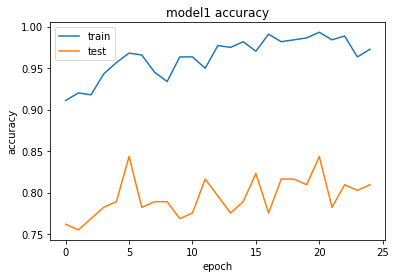

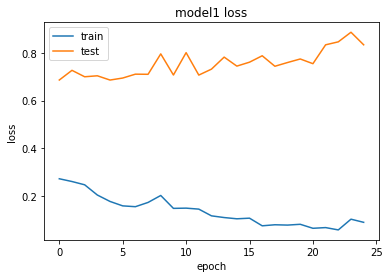

In [86]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
print("[INFO]")
predictions = model1.predict(testX, batch_size=32)
x=list(map(str,lb.classes_))
print(classification_report(testY.argmax(axis=1), 
       predictions.argmax(axis=1), target_names=x))

[INFO]
              precision    recall  f1-score   support

      GMB_01       0.78      0.64      0.71        28
      GMB_02       0.86      0.69      0.77        26
      GMB_03       0.86      0.86      0.86        29
      GMB_04       0.79      0.90      0.84        30
      GMB_05       0.78      0.91      0.84        34

    accuracy                           0.81       147
   macro avg       0.81      0.80      0.80       147
weighted avg       0.81      0.81      0.81       147



In [88]:
model1.save('pemograman pyton 11')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: pemograman pyton 11/assets


In [95]:
import cv2
import matplotlib.pyplot as plt
image1='daun.jpg'

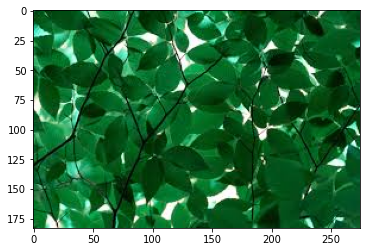

In [96]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [98]:
image_testing = Image.open('daun.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [99]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [100]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[8.3514769e-06 6.4069827e-06 9.9997437e-01 1.0801113e-05 3.1969613e-10]]
['GMB_03']
